**Домашнее задание №1**

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

import pickle
import re
import warnings

from IPython.display import display

warnings.filterwarnings('ignore')

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [3]:
print("Для воспроизведения результатов при наличии псевдорандомных алгоритмов")

Для воспроизведения результатов при наличии псевдорандомных алгоритмов


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [3]:
np.random.seed(42)

display(df_train.sample(10))

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [4]:
print('Первые 5 объектов тестового датасета:')
display(df_test.head(5))
print('Последние 5 объектов тестового датасета:')
display(df_test.tail(5))

Первые 5 объектов тестового датасета:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


Последние 5 объектов тестового датасета:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [5]:
print('Train:')
display(df_train.describe(include=[np.number]))
display(df_train.describe(include=[object]))

print('\nTest:')
display(df_test.describe(include=[np.number]))
display(df_test.describe(include=[object]))

Train:


,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468



Test:


,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [6]:
print('В колонках mileage, engine, max_power, torque, seats есть пропуски')

В колонках mileage, engine, max_power, torque, seats есть пропуски


In [7]:
display(df_train.isna().sum(), display(df_test.isna().sum()))

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

None

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [8]:
df_train_without_y = df_train.drop(['selling_price'], axis=1)

print(f"{df_train_without_y.duplicated().sum()} дублирующихся объектов")

1159 дублирующихся объектов


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [9]:
df_train_without_y[df_train_without_y.duplicated()]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [10]:
df_train = df_train.drop_duplicates(subset=[*df_train_without_y.columns], keep='first')

In [11]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [12]:
df_train.reset_index(drop=True, inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [13]:
for col in ['mileage', 'engine']:
    df_train[col] = df_train[col].str.replace(r'\D', '', regex=True).astype(float)
    df_test[col] = df_test[col].str.replace(r'\D', '', regex=True).astype(float)

In [14]:
df_test['max_power'] = df_test['max_power'].str.replace(r'\D', '', regex=True).astype(float)

df_train['max_power'] = df_train['max_power'].str.replace(r'\D', '', regex=True)
df_train.loc[3586, ['max_power']] = np.NaN
df_train['max_power'] = df_train['max_power'].astype(float)

In [15]:
# Доп лень делать (чуть-чуть начал и понял, что это не стоит потраченного времени)
df_train.drop(['torque'], axis=1, inplace=True)
df_test.drop(['torque'], axis=1, inplace=True)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [16]:
med_train = df_train[['mileage', 'engine', 'max_power', 'seats']].median()
df_train = df_train.fillna(med_train)
df_test = df_test.fillna(med_train)

print('Train:')
display(df_train.isna().sum())

print('Test:')
display(display(df_test.isna().sum()))

Train:


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

Test:


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

None


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [17]:
for col in ['engine', 'seats']:
    df_train[col] = df_train[col].astype(int)
    df_test[col] = df_test[col].astype(int)    

In [18]:
print(np.sort(pd.Series(np.concatenate((df_train['seats'], df_test['seats']))).unique()))

print('''
Количество дверей можно расценивать как категориальный признак, 
так как эта переменная имеет четко ограниченный набор значений 
(и вряд ли в будущих данных появятся новые значения этой категории),
который мог бы лучше быть использован как категориальный признак,
например, через Mean Target Encoding
''')

[ 2  4  5  6  7  8  9 10 14]

Количество дверей можно расценивать как категориальный признак, 
так как эта переменная имеет четко ограниченный набор значений 
(и вряд ли в будущих данных появятся новые значения этой категории),
который мог бы лучше быть использован как категориальный признак,
например, через Mean Target Encoding



## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

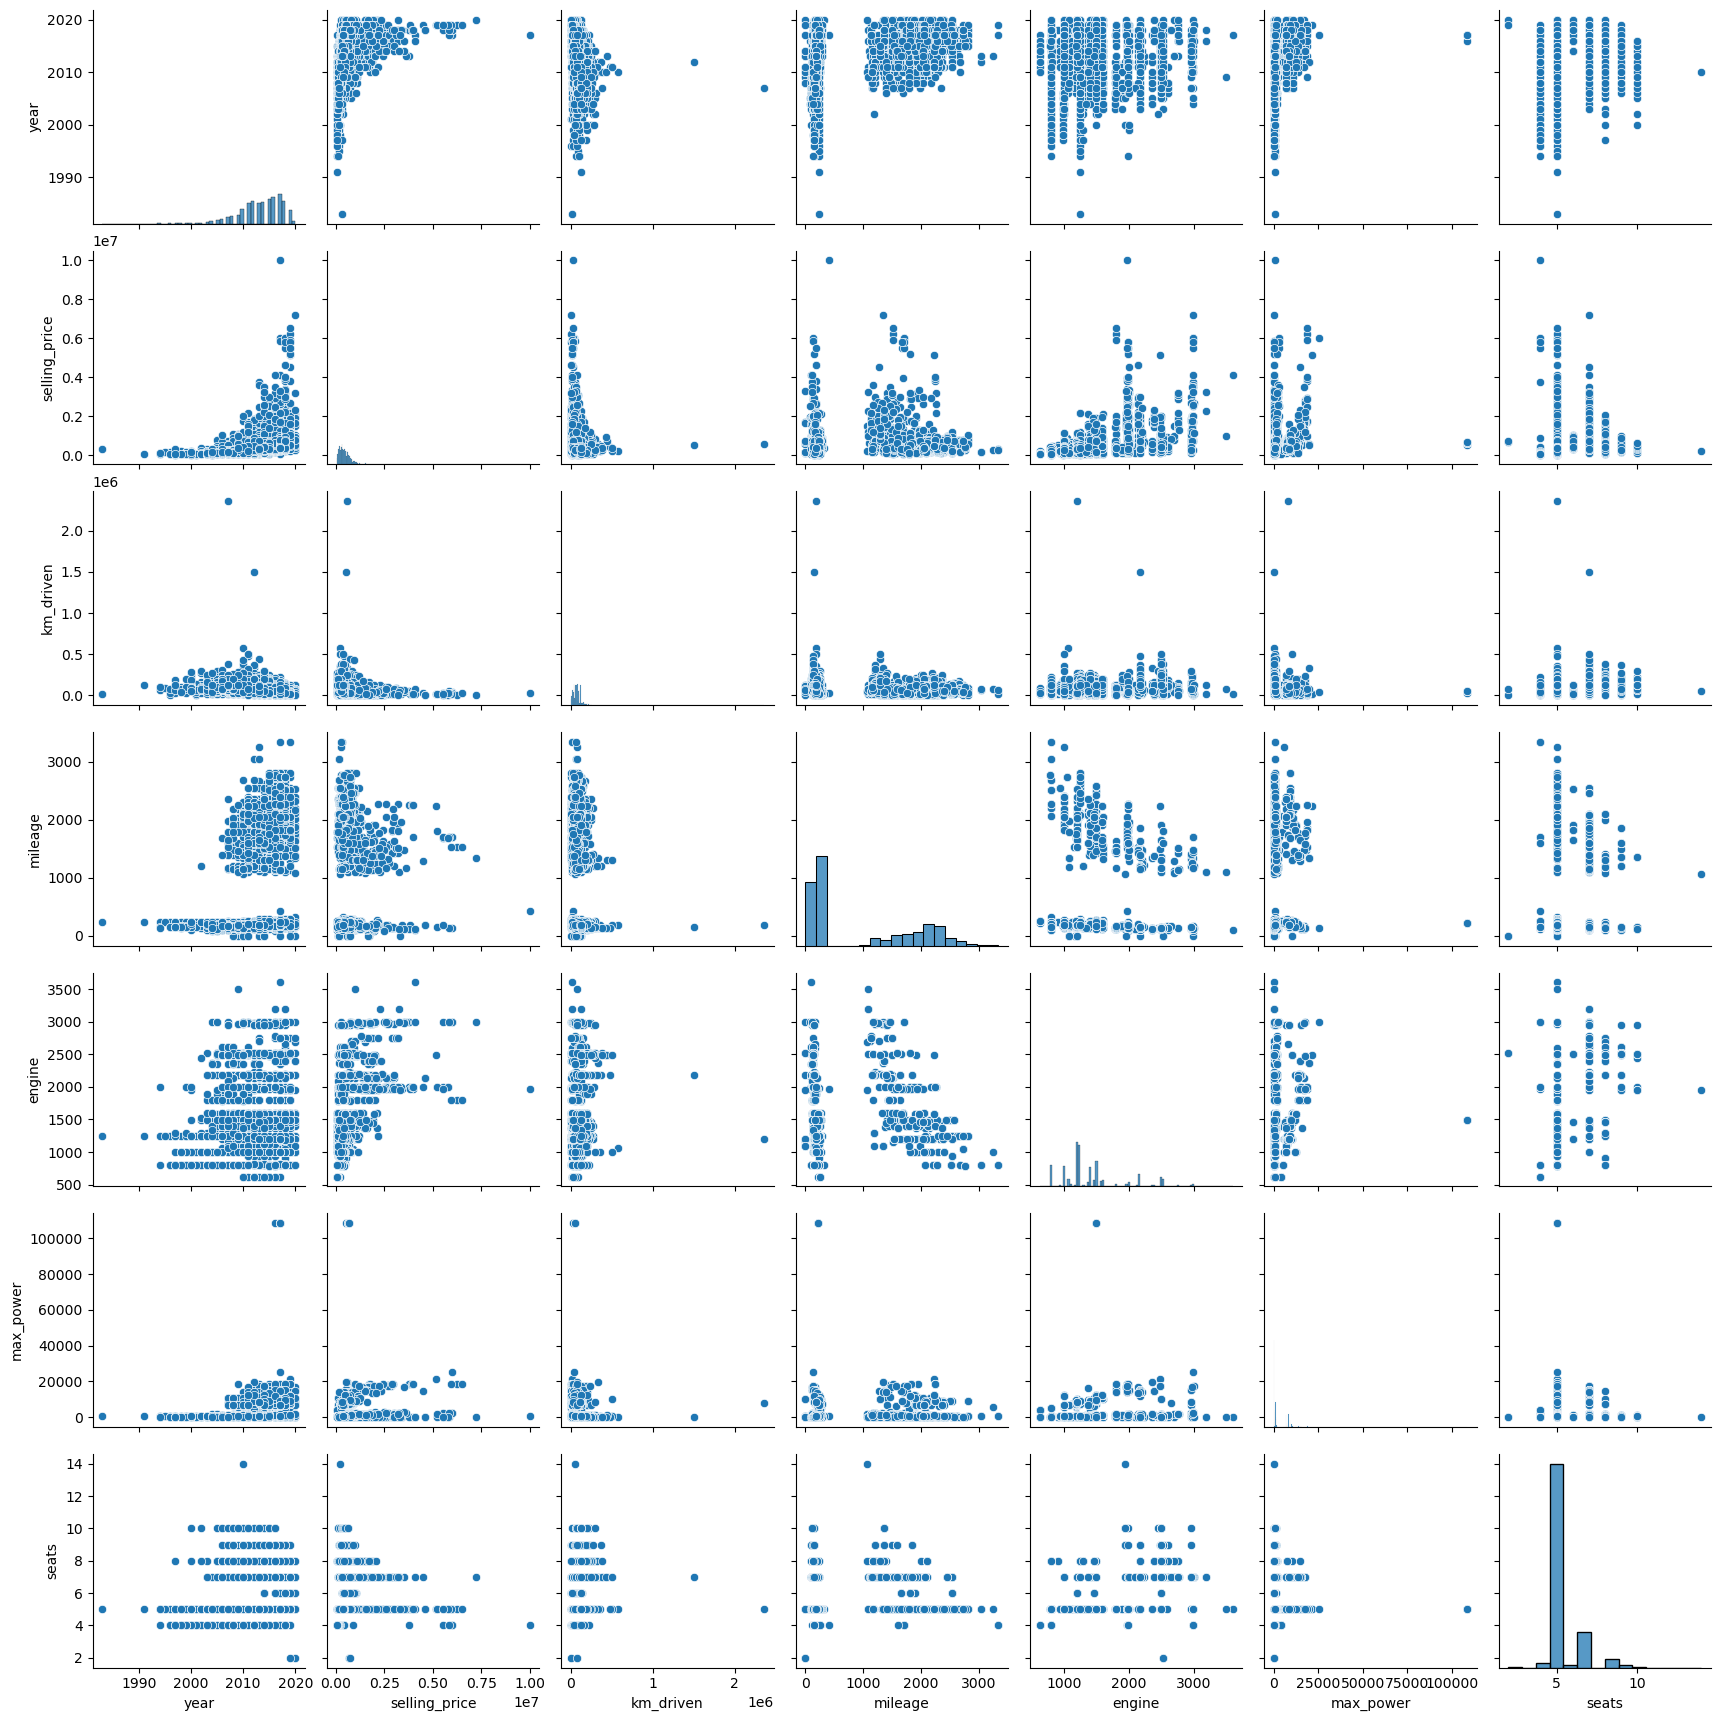

In [34]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [43]:
print('''
Что можно сказать о связи предикторов с целевой переменной?
Ответ: Cудя по графикам, почти все предикторы (кроме, возможно, max_power и km_driven)
не имеют однозначную линейную зависимость с целевой переменной, 
поэтому вряд ли задача совсем тривиальна
\n
А о корреляциях признаков?
Ответ: Какие-то имеют нечто похожее на линейную зависимость (i.e. km_driven и engine),
а какие-то либо имеют иную зависимость (i.e. engine и mileage)
(для ответа на этот вопрос лучше использовать статистический тест на 
значимость коэффициентов линейной корреляции и проверить его на 
адекватность, посмотрев на графики)
''')


Что можно сказать о связи предикторов с целевой переменной?
Ответ: Cудя по графикам, почти все предикторы (кроме, возможно, max_power и km_driven)
не имеют однозначную линейную зависимость с целевой переменной, 
поэтому вряд ли задача совсем тривиальна


А о корреляциях признаков?
Ответ: Какие-то имеют нечто похожее на линейную зависимость (i.e. km_driven и engine),
а какие-то либо имеют иную зависимость (i.e. engine и mileage)
(для ответа на этот вопрос лучше использовать статистический тест на 
значимость коэффициентов линейной корреляции и проверить его на 
адекватность, посмотрев на графики)



(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

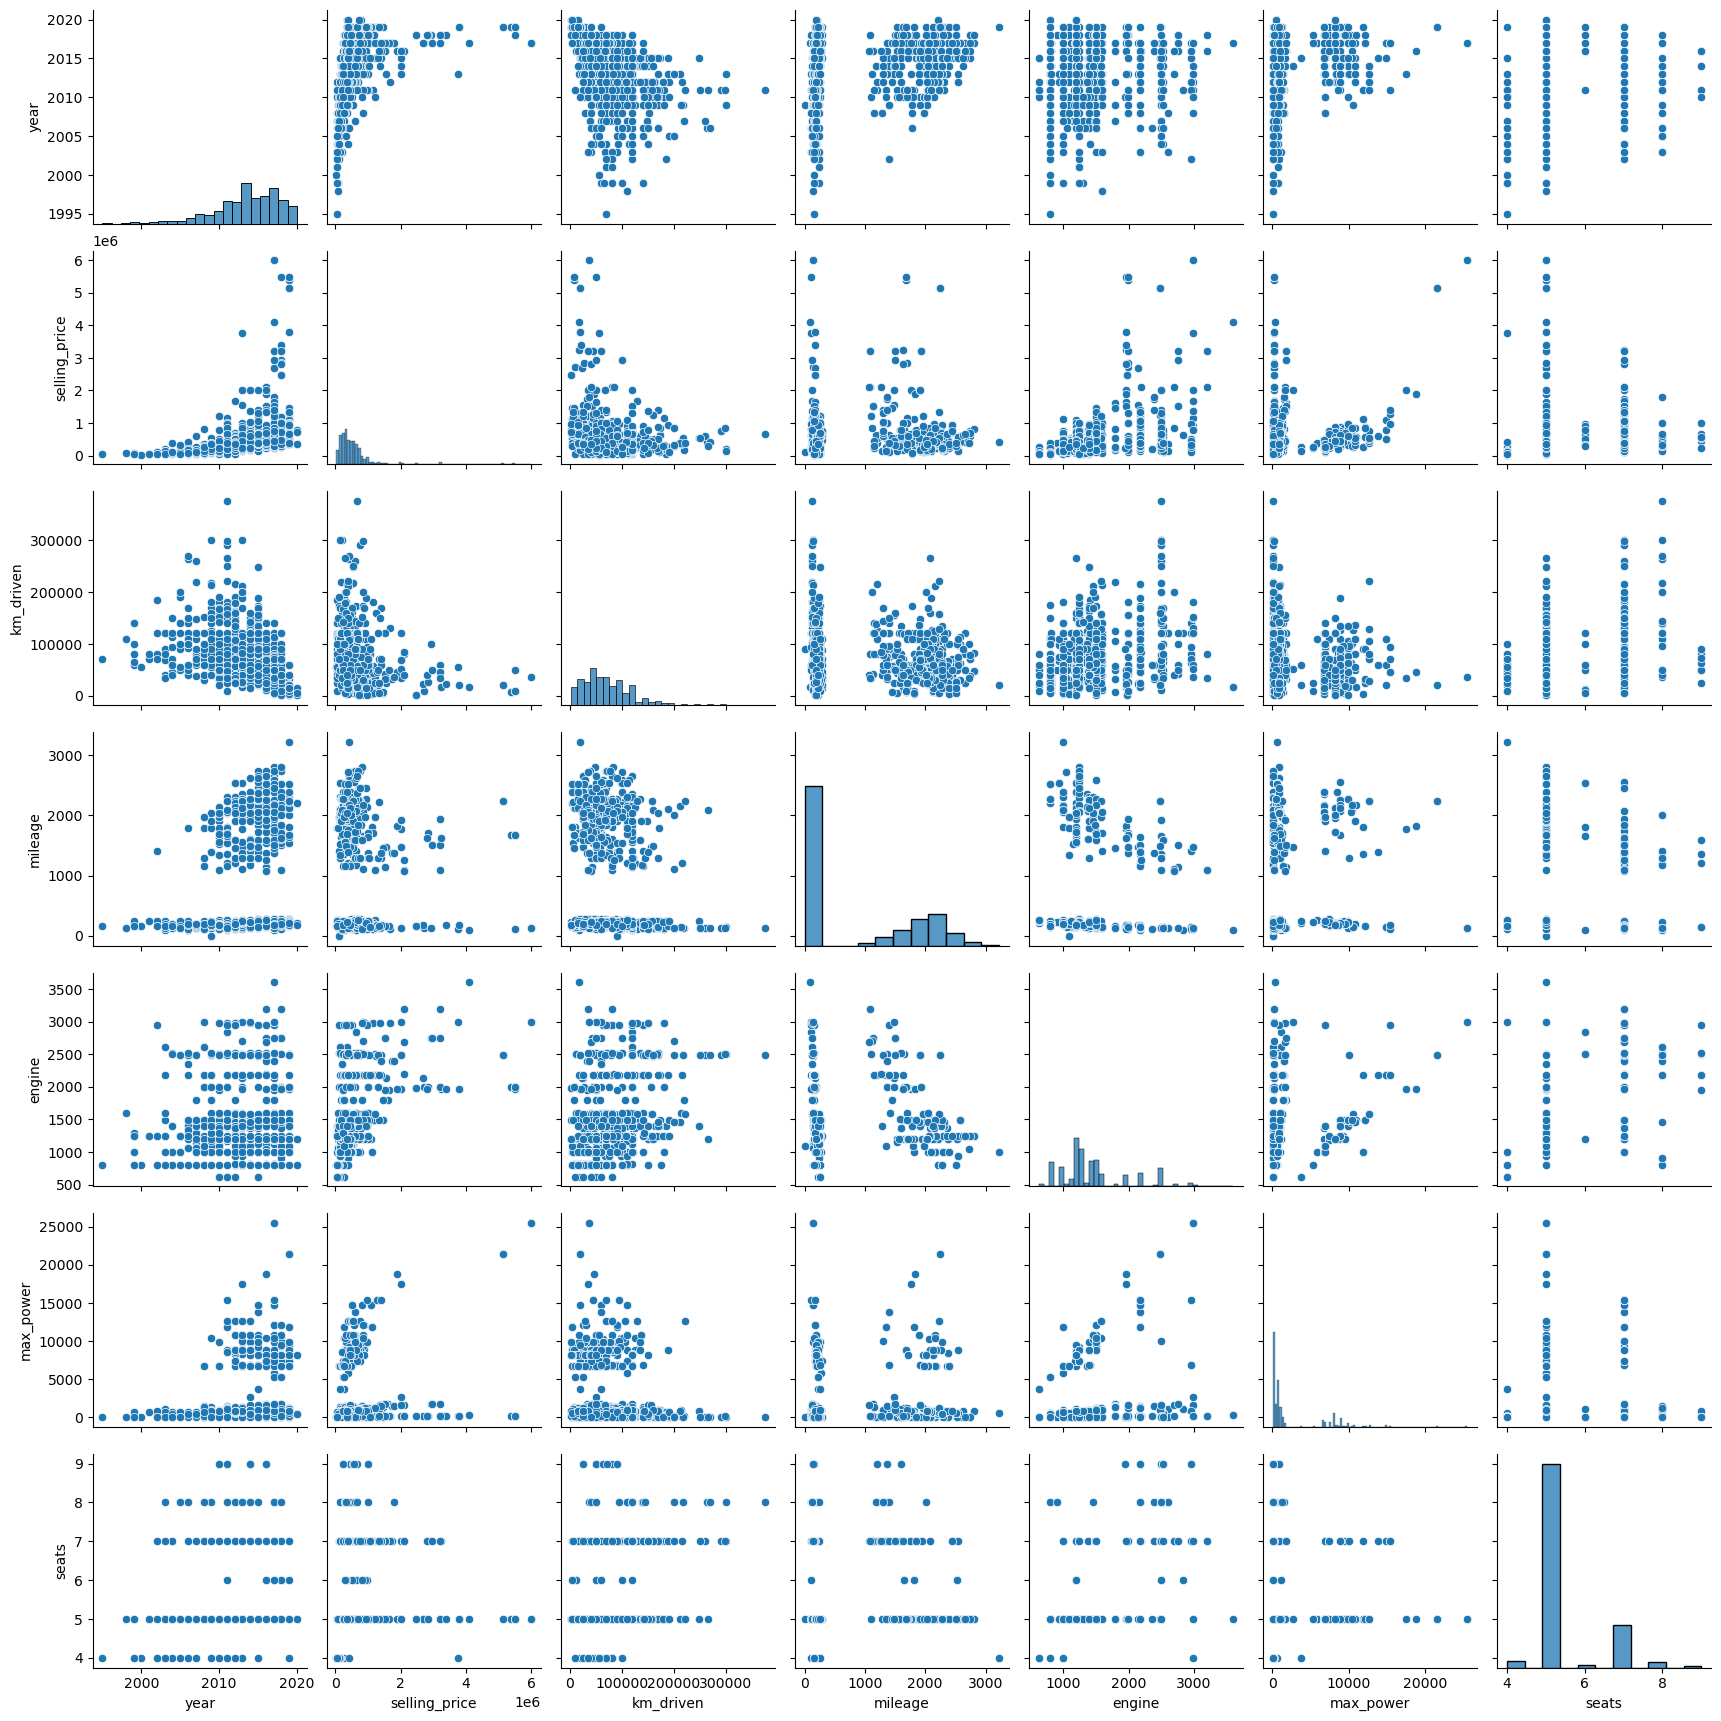

In [35]:
sns.pairplot(df_test)

In [36]:
print('''
В среднем, тест достаточно неплохо похож на тест, но имеет
определенные частные отличия, что вполне логично, так как это
идейно схожие данные, но сами представители в каждом из датасетов
могут достаточно отличаться
\n
К тому же, данные отличия помогут нам контролировать 'переобученность' 
наших будущих моделей
''')


В среднем, тест достаточно неплохо похож на тест, но имеет
определенные частные отличия, что вполне логично, так как это
идейно схожие данные, но сами представители в каждом из датасетов
могут достаточно отличаться


К тому же, данные отличия помогут нам контролировать 'переобученность' 
наших будущих моделей



(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

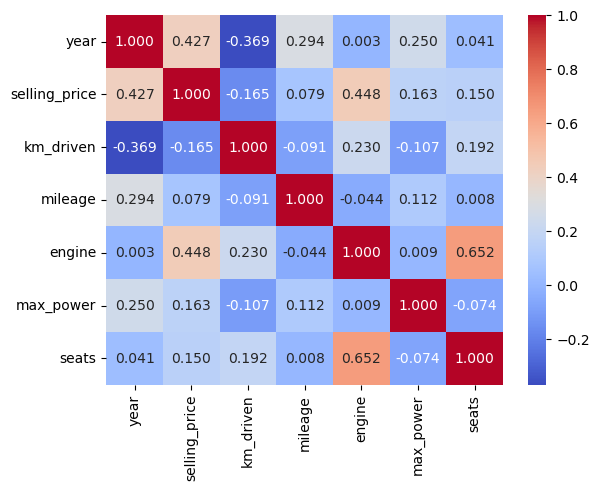

In [37]:
corr_mat = df_train[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']].corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".3f")

plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?</font>

In [44]:
print('''
Какие 2 признака наименее скоррелированы между собой?
Ответ: Engine и Year
\n
Между какими наблюдается довольно сильная положительная линейная зависимость?
Ответ: Engine и Seats
\n
Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
Ответ: Да, что логично, так как более старые машины, скорее всего, были дольше в эксплуатации
''')


Какие 2 признака наименее скоррелированы между собой?
Ответ: Engine и Year


Между какими наблюдается довольно сильная положительная линейная зависимость?
Ответ: Engine и Seats


Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
Ответ: Да, что логично, так как более старые машины, скорее всего, были дольше в эксплуатации



(0.25 балла) <font color='#9933CC'> Отобразите диаграмму рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

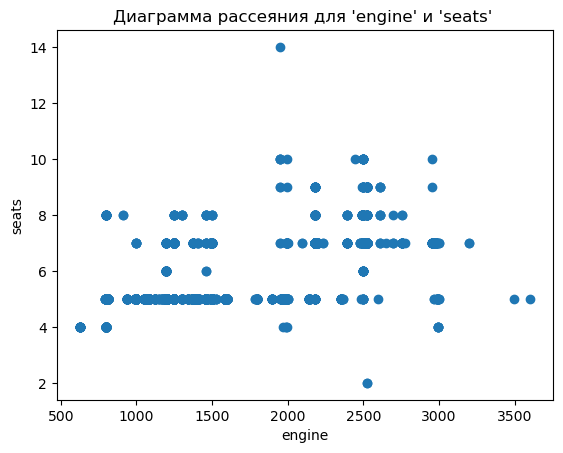

In [45]:
plt.scatter(df_train['engine'], df_train['seats'])
plt.title("Диаграмма рассеяния для 'engine' и 'seats' ")
plt.xlabel('engine')
plt.ylabel('seats')
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [38]:
print('''
Мы совершенно проигнорировали категориальные переменные, поэтому
стоит попробовать получить какой-то поверхностный inference из
графиков по категориальным признакам
''')


Мы совершенно проигнорировали категориальные переменные, поэтому
стоит попробовать получить какой-то поверхностный inference из
графиков по категориальным признакам



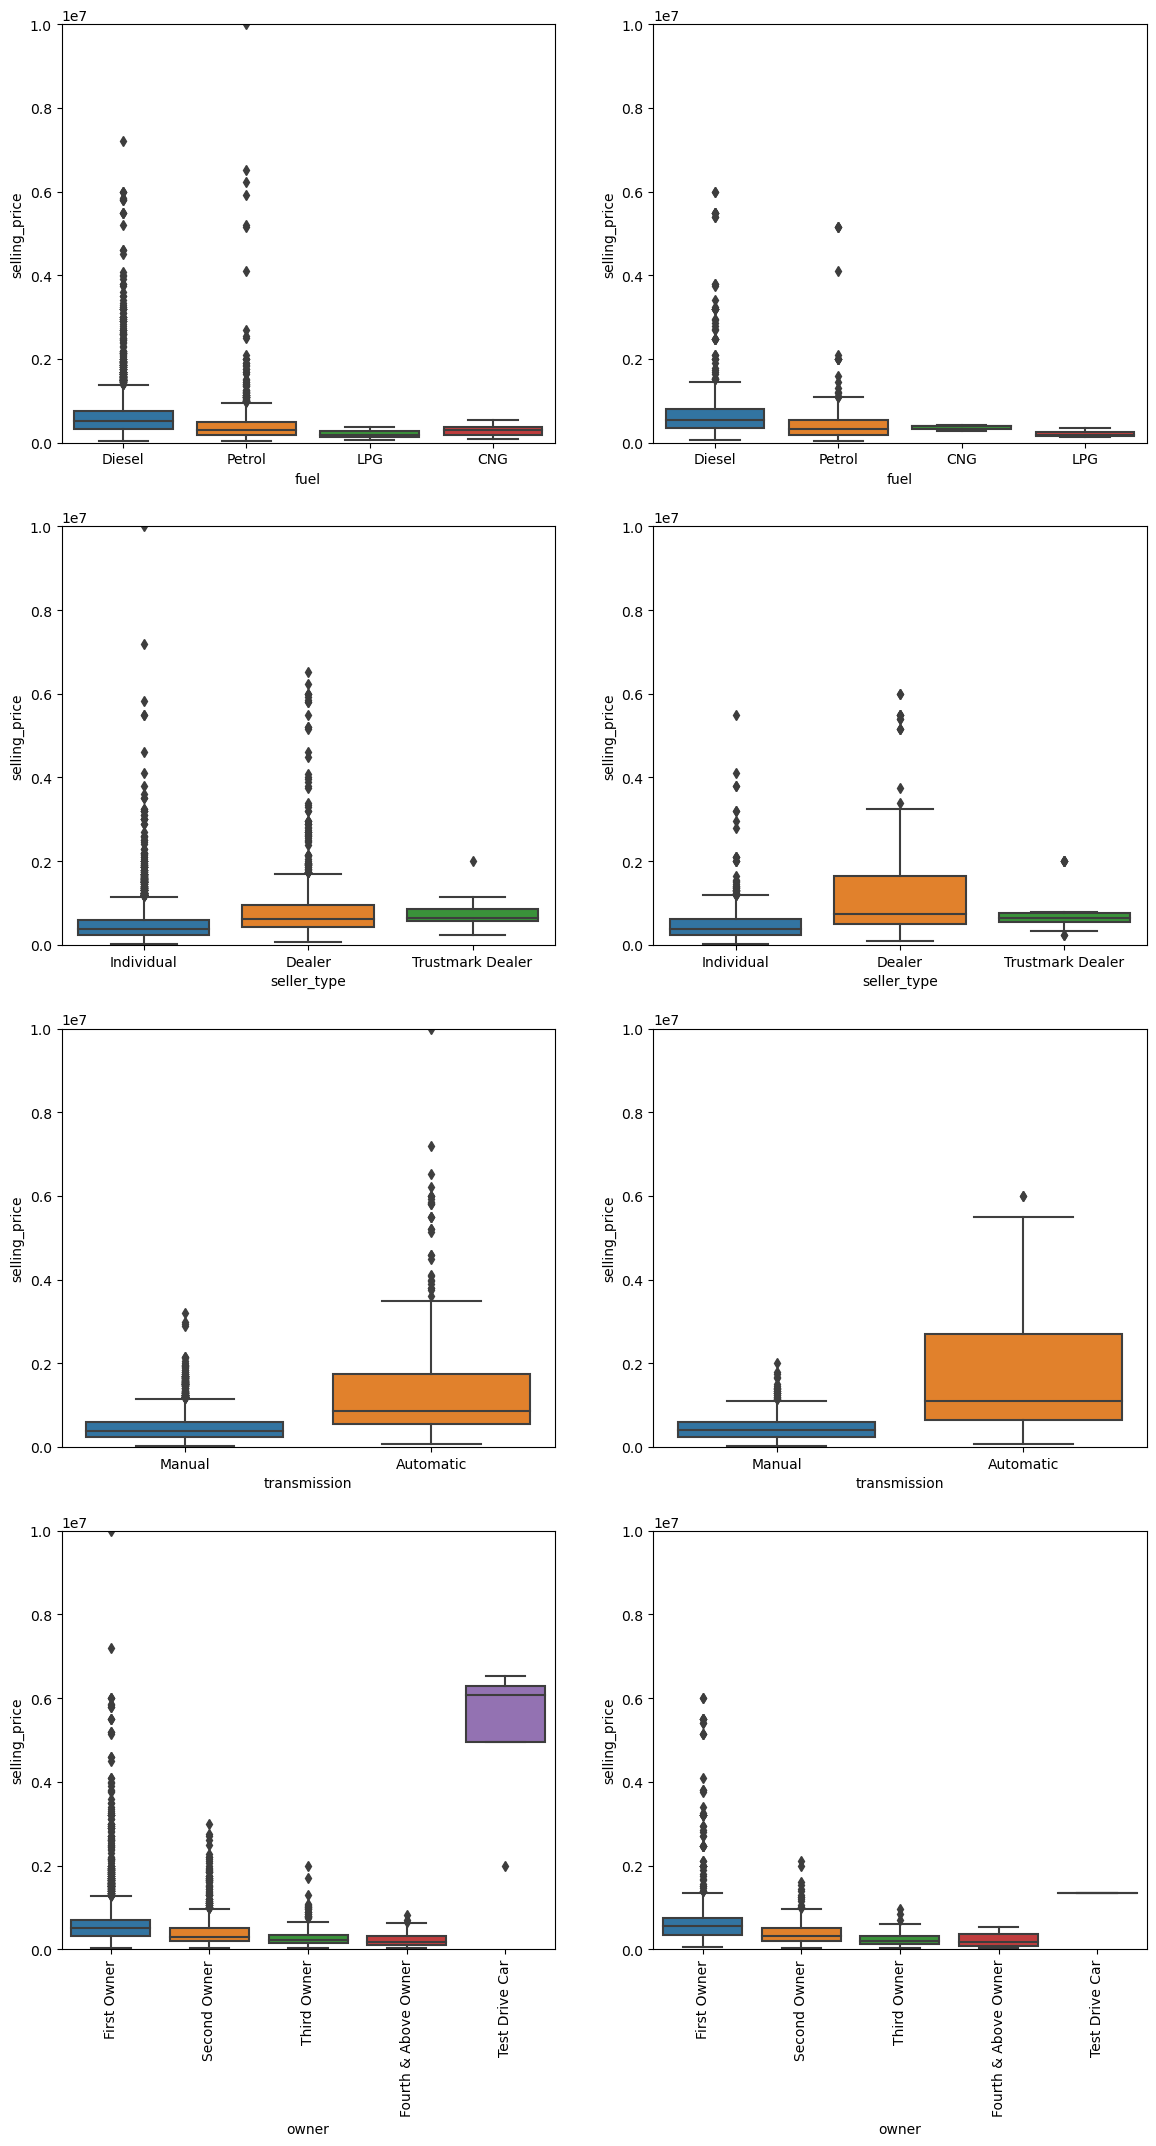

In [39]:
fig, axes = plt.subplots(4, 2, figsize=(14, 25))

for i, col in enumerate(['fuel', 'seller_type', 'transmission', 'owner']):
    sns.boxplot(x=df_train[col], y=df_train['selling_price'], ax=axes[i, 0])
    sns.boxplot(x=df_test[col], y=df_test['selling_price'], ax=axes[i, 1])
    
    for j in range(2):
        axes[i, j].set_ylim(0, 10000000)
        axes[i, j].set_ylim(0, 10000000)

for i in range(2):
    axes[3, i].set_xticklabels(axes[3, i].get_xticklabels(), rotation=90)        

plt.show()

In [46]:
print('''
Выводы: 
Легко заметить, что распределение нашей целевой переменной как на трейне, так и на тесте,
значительно варьируется в зависимости от класса внутри конкретной категории, что намекает нам на то,
что наши категориальные признаки могут помочь нам лучше предсказывать значение целевой переменной
\n
К тому же, можно заметить, что распределение нашей целевой переменной относительно категориальных
признаков на трейне и тесте имеет очень схожую структуру
''')


Выводы: 
Легко заметить, что распределение нашей целевой переменной как на трейне, так и на тесте,
значительно варьируется в зависимости от класса внутри конкретной категории, что намекает нам на то,
что наши категориальные признаки могут помочь нам лучше предсказывать значение целевой переменной


К тому же, можно заметить, что распределение нашей целевой переменной относительно категориальных
признаков на трейне и тесте имеет очень схожую структуру



# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [19]:
y_train = df_train[['selling_price']]
X_train = df_train.drop(['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1)

In [20]:
assert X_train.shape == (5840, 6)

In [21]:
y_test = df_test[['selling_price']]
X_test = df_test.drop(['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1)

In [22]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [23]:
def print_metrics(y_true_train, pred_train, y_true_test, pred_test):
    print(f'R^2 train: {r2_score(y_true_train, pred_train)}')
    print(f'MSE train: {MSE(y_true_train, pred_train)}')    
    print('\n')
    print(f'R^2 test: {r2_score(y_true_test, pred_test)}')
    print(f'MSE test: {MSE(y_true_test, pred_test)}')    

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

np.random.seed(42)

lr = LinearRegression()
lr = lr.fit(X_train, y_train)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

print_metrics(y_train, pred_train, y_test, pred_test)

R^2 train: 0.43810667288301364
MSE train: 161060169619.19736


R^2 test: 0.4331579855324774
MSE test: 325836976451.5522


In [25]:
pd.DataFrame(lr.coef_, columns=X_train.columns)

,year,km_driven,mileage,engine,max_power,seats
0,51202.56737,-1.037472,-11.734397,707.423949,3.293954,-141663.215202


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [26]:
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [27]:
np.random.seed(42)

lr = LinearRegression()
lr = lr.fit(X_train, y_train)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

print_metrics(y_train, pred_train, y_test, pred_test)

R^2 train: 0.43810667288301464
MSE train: 161060169619.19708


R^2 test: 0.433157985532478
MSE test: 325836976451.5519


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [28]:
pd.DataFrame(lr.coef_, columns=X_train.columns)

,year,km_driven,mileage,engine,max_power,seats
0,209688.403468,-62316.778458,-10771.058316,343540.103215,16035.870429,-139150.087345


In [51]:
print('''
Судя по абсолютному значению коэффициента, признак 'engine' оказался наиболее информативным в предсказании цены
''')


Судя по абсолютному значению коэффициента, признак 'engine' оказался наиболее информативным в предсказании цены



(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [29]:
from sklearn.linear_model import Lasso

lr_lasso = Lasso(random_state=42)
lr_lasso = lr_lasso.fit(X_train, y_train)

pred_train = lr_lasso.predict(X_train)
pred_test = lr_lasso.predict(X_test)

print_metrics(y_train, pred_train, y_test, pred_test)

R^2 train: 0.4381066728501908
MSE train: 161060169628.60565


R^2 test: 0.4331563725129275
MSE test: 325837903661.2503


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [30]:
pd.DataFrame(lr_lasso.coef_.reshape(1,-1), columns=X_train.columns)

,year,km_driven,mileage,engine,max_power,seats
0,209687.372987,-62315.953386,-10769.76717,343537.178945,16035.301549,-139147.348123


In [61]:
print('''
Нет. Видимо, для наших данных слишком малое значение alpha
''')


Нет. Видимо, для наших данных слишком малое значение alpha



(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [62]:
from sklearn.model_selection import GridSearchCV

lr_lasso = Lasso(random_state=42)
parameters = {'alpha': np.arange(1, 20000, 50)}

grid_search = GridSearchCV(lr_lasso, parameters, cv=10)

In [63]:
%%time
grid_search.fit(X_train, y_train)

print("Наилучшие параметры:", grid_search.best_params_)
print("Лучшая оценка R^2:", grid_search.best_score_)

Наилучшие параметры: {'alpha': 15951}
Лучшая оценка R^2: 0.43214448251684645
CPU times: total: 15.6 s
Wall time: 53.8 s


In [67]:
lr_lasso = Lasso(alpha=15951, random_state=42)
lr_lasso = lr_lasso.fit(X_train, y_train)

pred_train = lr_lasso.predict(X_train)
pred_test = lr_lasso.predict(X_test)

print_metrics(y_train, pred_train, y_test, pred_test)

display(pd.DataFrame(lr_lasso.coef_.reshape(1,-1), columns=X_train.columns))

R^2 train: 0.4307913318443939
MSE train: 163157026819.0286


R^2 test: 0.40310011048544503
MSE test: 343115101350.3987


,year,km_driven,mileage,engine,max_power,seats
0,195969.3997,-48999.743956,-0.0,296438.567368,7397.697704,-95195.089236


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [65]:
print('''
Для перебора 400 параметров по 10 фолдам  ушла, примерно, 1 минута
''')


Для перебора 400 параметров по 10 фолдам  ушла, примерно, 1 минута



<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [198]:
print('''
Лучшим на валидации оказался alpha=15951, занулился параметр mileage
\n
Стоит заметить, что лучший alpha на валидации не соотвествует лучшему качеству
на тесте, что может свидетельствовать о том, что Lasso регуляризация 
нам не особо помогает улучшить качество предикта
''')


Лучшим на валидации оказался alpha=15951, занулился параметр mileage


Стоит заметить, что лучший alpha на валидации не соотвествует лучшему качеству
на тесте, что может свидетельствовать о том, что Lasso регуляризация 
нам не особо помогает улучшить качество предикта



(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [70]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(random_state=42)
parameters = {'alpha': np.arange(1, 20000, 100), 'l1_ratio': np.arange(0.05, 1, 0.05)}

grid_search = GridSearchCV(elastic_net, parameters, cv=10)

In [69]:
grid_search.fit(X_train, y_train)

print("Наилучшие параметры:", grid_search.best_params_)
print("Лучшая оценка R^2:", grid_search.best_score_)

Наилучшие параметры: {'alpha': 1, 'l1_ratio': 0.9000000000000001}
Лучшая оценка R^2: 0.4311387612028799


In [71]:
elastic_net = ElasticNet(alpha=1, l1_ratio=0.9, random_state=42)
elastic_net = elastic_net.fit(X_train, y_train)

pred_train = elastic_net.predict(X_train)
pred_test = elastic_net.predict(X_test)

print_metrics(y_train, pred_train, y_test, pred_test)

display(pd.DataFrame(elastic_net.coef_.reshape(1,-1), columns=X_train.columns))

R^2 train: 0.4290485047784216
MSE train: 163656587873.26404


R^2 test: 0.3980405753313212
MSE test: 346023466635.2456


,year,km_driven,mileage,engine,max_power,seats
0,187364.167132,-59013.551937,-7071.053631,282304.33096,23424.217725,-89465.279169


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [60]:
print('''
alpha=1
l1_ratio=0.9
\n
Стоит заметить, что лучший alpha и l1_ratio на валидации не соотвествует лучшему качеству
на тесте, что может свидетельствовать о том, что ElasticNet регуляризация 
нам не особо помогает улучшить качество предикта
''')


alpha=1
l1_ratio=0.9


Стоит заметить, что лучший alpha и l1_ratio на валидации не соотвествует лучшему качеству
на тесте, что может свидетельствовать о том, что ElasticNet регуляризация 
нам не особо помогает улучшить качество предикта



Предлагаем вам оставить попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

In [207]:
print('Соглы)))')

Соглы)))


# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [31]:
X_train_cat = df_train.drop(['name', 'selling_price'], axis=1)

In [32]:
assert X_train_cat.shape == (5840, 10)

In [33]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.25 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [34]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

X_train_cat = pd.concat(
    [
        X_train_cat.drop(['seats', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1),
        
        pd.get_dummies(X_train_cat['seats'], prefix='seats', drop_first=True),
        pd.get_dummies(X_train_cat['fuel'], prefix='fuel', drop_first=True),
        pd.get_dummies(X_train_cat['seller_type'], prefix='seller_type', drop_first=True),
        pd.get_dummies(X_train_cat['transmission'], prefix='transmission', drop_first=True),
        pd.get_dummies(X_train_cat['owner'], prefix='owner', drop_first=True)
    ], 
    axis=1
)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [35]:
from sklearn.preprocessing import MinMaxScaler

np.random.seed(42)

mms = MinMaxScaler()
X_train_cat_scaled = mms.fit_transform(X_train_cat)
X_train_cat = pd.DataFrame(X_train_cat_scaled, columns=X_train_cat.columns)

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

lr_ridge = Ridge(random_state=42)
parameters = {'alpha': np.arange(0.1, 10, 0.05)}

grid_search = GridSearchCV(lr_ridge, parameters, cv=10, scoring='r2')

In [37]:
grid_search.fit(X_train_cat, y_train)

print("Наилучшие параметры:", grid_search.best_params_)
print("Лучшая оценка R^2:", grid_search.best_score_)

Наилучшие параметры: {'alpha': 4.600000000000001}
Лучшая оценка R^2: 0.5329415690066749


In [68]:
print('''
Получилось существенно улучшить качество модели: на 10 пунктов по R^2
''')


Получилось существенно улучшить качество модели: на 10 пунктов по R^2



# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*  
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);  
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)  

2.   *Добыть новые признаки:*  
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)  
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*  
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;  
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много  
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить  
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать  

И так далее...

Feel Free to Try!

## Main (baseline, which we will try to overcome)

In [516]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import Ridge

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error as MSE

In [517]:
y_train = df_train[['selling_price']]
y_test = df_test[['selling_price']]

X_train = df_train.drop(['name', 'selling_price'], axis=1)
X_test = df_test.drop(['name', 'selling_price'], axis=1)

X_train = pd.concat(
    [
        X_train.drop(['fuel', 'seller_type', 'transmission', 'owner'], axis=1), 
        pd.get_dummies(X_train['fuel'], prefix='fuel', drop_first=True),
        pd.get_dummies(X_train['seller_type'], prefix='seller_type', drop_first=True),
        pd.get_dummies(X_train['transmission'], prefix='transmission', drop_first=True),
        pd.get_dummies(X_train['owner'], prefix='owner', drop_first=True)
    ], 
    axis=1
)

X_test = pd.concat(
    [
        X_test.drop(['fuel', 'seller_type', 'transmission', 'owner'], axis=1), 
        pd.get_dummies(X_test['fuel'], prefix='fuel', drop_first=True),
        pd.get_dummies(X_test['seller_type'], prefix='seller_type', drop_first=True),
        pd.get_dummies(X_test['transmission'], prefix='transmission', drop_first=True),
        pd.get_dummies(X_test['owner'], prefix='owner', drop_first=True)
    ], 
    axis=1
)


mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [518]:
lr_ridge = Ridge(alpha=4.6, random_state=42)
lr_ridge = lr_ridge.fit(X_train, y_train)

pred_train = lr_ridge.predict(X_train)
pred_test = lr_ridge.predict(X_test)

print_metrics(y_train, pred_train, y_test, pred_test)

R^2 train: 0.5401167801506519
MSE train: 131820161976.29178


R^2 test: 0.5353341372563827
MSE test: 267103206735.4052


## Trick 1: Mean Target Encoding

> **Поянение:** Попробуем вместо OneHotEncdoing применить MeanTargetEncoding и посмотрим, улучшится ли качество

In [519]:
cat_colls = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
targ_enc = TargetEncoder(smooth="auto", target_type="continuous", cv=20, random_state=42)

train_cat = df_train.drop(['name', 'selling_price'], axis=1)
test_cat = df_test.drop(['name', 'selling_price'], axis=1)

targ_enc = targ_enc.fit(train_cat[cat_colls], y_train.selling_price)

In [520]:
train_cat = pd.concat(
    [
        train_cat.drop([*cat_colls], axis=1), 
        pd.DataFrame(targ_enc.transform(train_cat[cat_colls]), columns=cat_colls)
    ], 
    axis=1
)

test_cat = pd.concat(
    [
        test_cat.drop([*cat_colls], axis=1), 
        pd.DataFrame(targ_enc.transform(test_cat[cat_colls]), columns=cat_colls)
    ], 
    axis=1
)

In [521]:
ss = StandardScaler()

train_cat_scaled = ss.fit_transform(train_cat)
test_cat_scaled = ss.transform(test_cat)

train_cat_scaled = pd.DataFrame(train_cat_scaled, columns=train_cat.columns)
test_cat_scaled = pd.DataFrame(test_cat_scaled, columns=test_cat.columns)

In [522]:
lr_ridge = Ridge(random_state=42)
lr_ridge = lr_ridge.fit(train_cat_scaled, y_train)

pred_train = lr_ridge.predict(train_cat_scaled)
pred_test = lr_ridge.predict(test_cat_scaled)

print_metrics(y_train, pred_train, y_test, pred_test)

R^2 train: 0.5112268461236894
MSE train: 140101124661.0493


R^2 test: 0.5331743071466508
MSE test: 268344738757.80682


> **Комментарии**: Улучшить качество, к сожалению, не получилось, но оно и не ухудшилось, а с подобными переменными взаимодействовать приятней, чем с one hot encoded переменными

## Trick 2: log of target variable and features

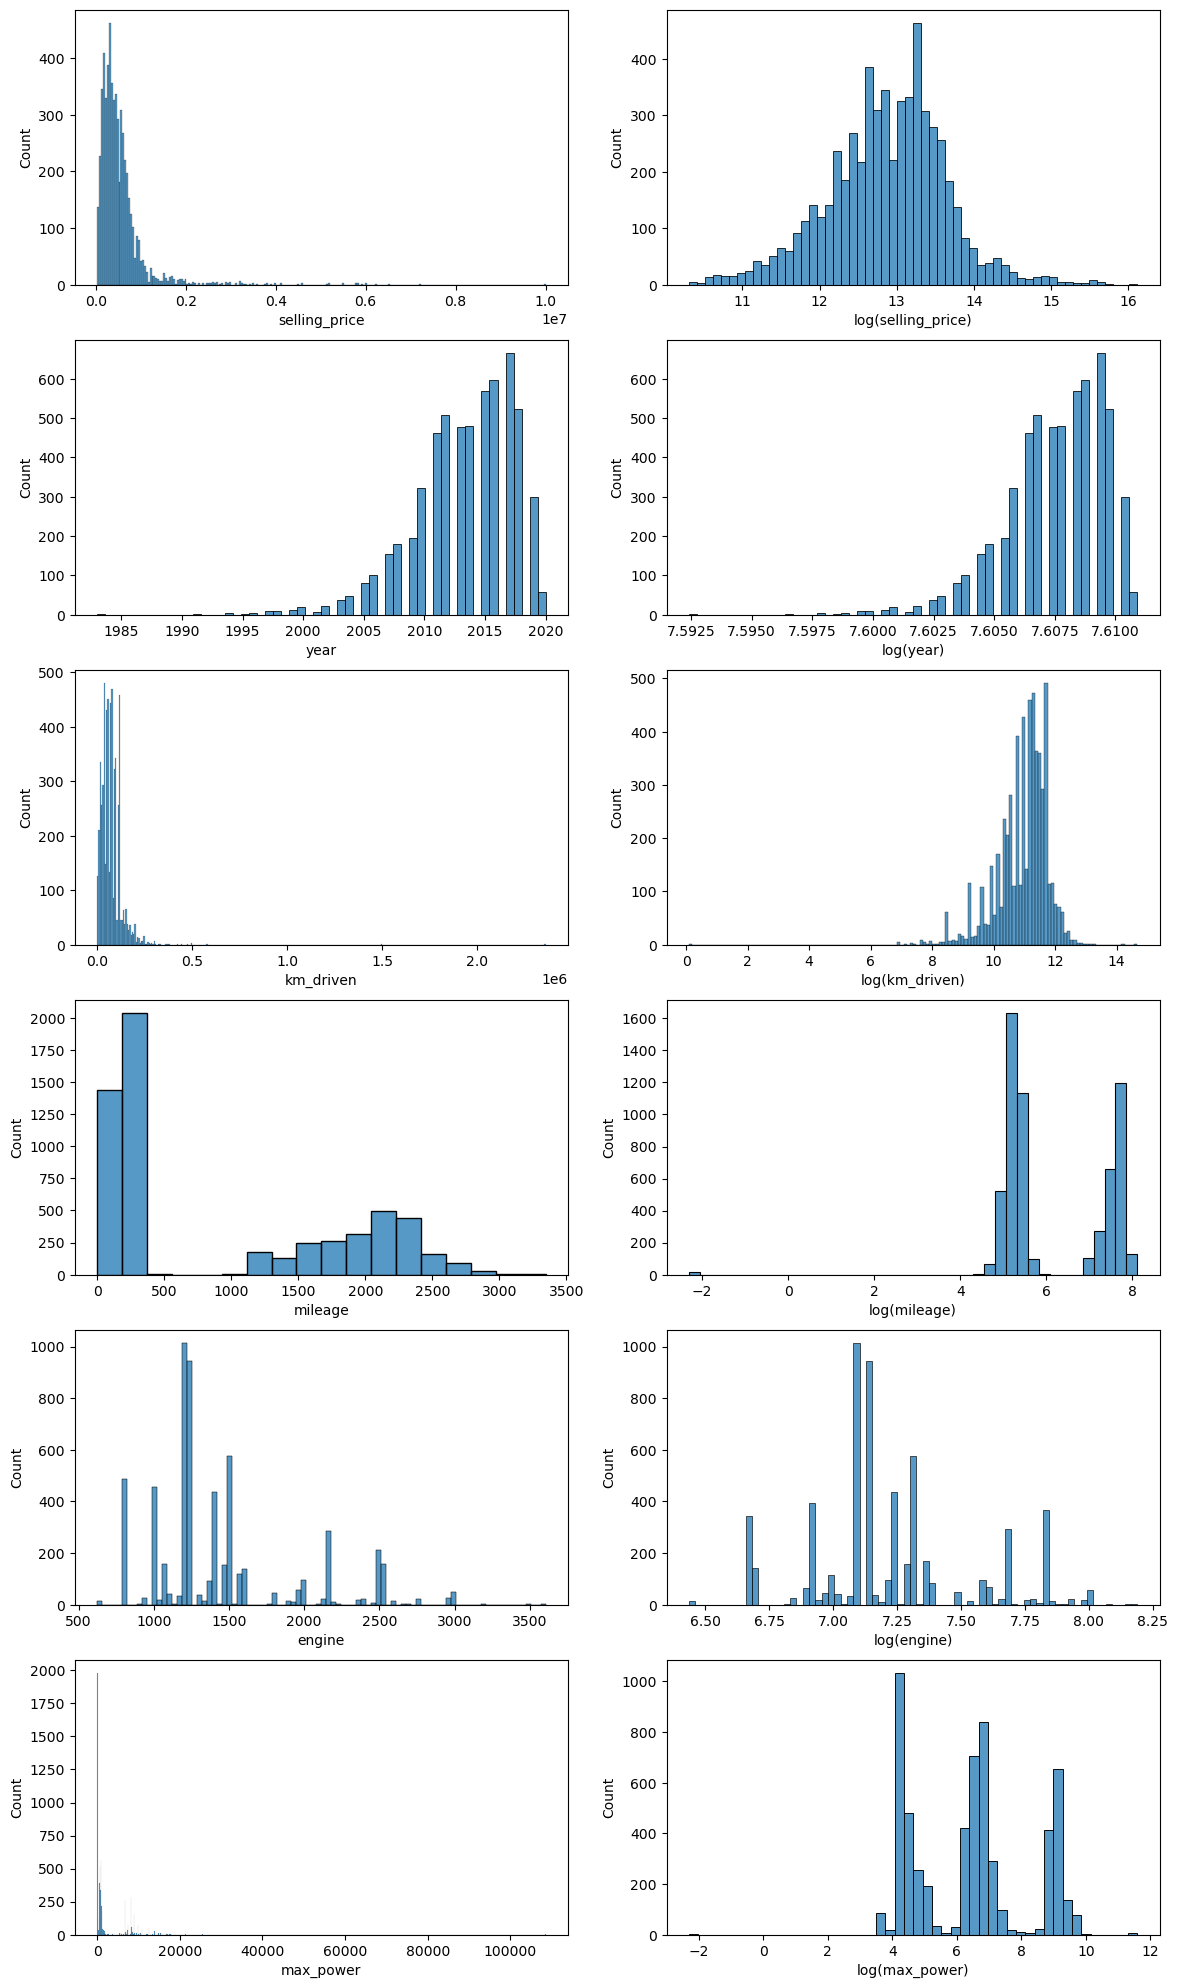

In [523]:
fig, axes = plt.subplots(6, 2, figsize=(14, 25))

for i, col in enumerate(['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power']):
    sns.histplot(df_train[col], ax=axes[i, 0])

    sns.histplot(np.log(df_train[col] + 0.1), ax=axes[i, 1], label='')
    axes[i, 1].set(xlabel=f'log({col})')

plt.show()

> **Комментарии**: Можно заметить, что selling_price и km_driven, скорее всего, подчиняются логнормальному распределению, как следствие, можно попробовать их логарифмировать и посмотреть, как изменится результат + можно попробовать логарифмировать max_power, так как хоть он и не подчиняется лог-нормальному распределению, но его логарифмировние может улучшить качество 

In [524]:
y_train_log = np.log(df_train[['selling_price']])
y_test_log = np.log(df_test[['selling_price']])

train_cat_log = train_cat.copy()
test_cat_log = test_cat.copy()

In [525]:
for col in ['km_driven', 'max_power']:
    train_cat_log.loc[:, col] = np.log(train_cat['km_driven']+0.1)
    test_cat_log.loc[:, col] = np.log(test_cat['km_driven']+0.1)

In [526]:
ss = StandardScaler()

train_cat_scaled = ss.fit_transform(train_cat_log)
test_cat_scaled = ss.transform(test_cat_log)

train_cat_scaled = pd.DataFrame(train_cat_scaled, columns=train_cat_log.columns)
test_cat_scaled = pd.DataFrame(test_cat_scaled, columns=test_cat_log.columns)

In [531]:
lr_ridge = Ridge(random_state=42)
lr_ridge = lr_ridge.fit(train_cat_scaled, y_train_log)

pred_train = lr_ridge.predict(train_cat_scaled)
pred_test = lr_ridge.predict(test_cat_scaled)

print_metrics(y_train_log, pred_train, y_test_log, pred_test)

R^2 train: 0.7785978525028976
MSE train: 0.12938407188839599


R^2 test: 0.8076734582479117
MSE test: 0.13757255224733822


> **Комментарии**: Получилось существенно улучшить качество модели, засчет логарифмирования целевой переменной и некоторых признаков

## Trick 3: polynomial trick

In [536]:
poly = PolynomialFeatures(degree=3)
poly = poly.fit(train_cat_scaled)

train_cat_new = poly.transform(train_cat_scaled)
test_cat_new = poly.transform(test_cat_scaled)

train_cat_new = pd.DataFrame(train_cat_new, columns=poly.get_feature_names_out(train_cat_scaled.columns))
test_cat_new = pd.DataFrame(test_cat_new, columns=poly.get_feature_names_out(train_cat_scaled.columns))

In [537]:
lr_ridge = Ridge(random_state=42)
lr_ridge = lr_ridge.fit(train_cat_new, y_train_log)

pred_train = lr_ridge.predict(train_cat_new)
pred_test = lr_ridge.predict(test_cat_new)

print_metrics(y_train_log, pred_train, y_test_log, pred_test)

R^2 train: 0.8456420533208171
MSE train: 0.09020445327860234


R^2 test: 0.8604243520808099
MSE test: 0.099839460226817


In [533]:
print(f'Количество признаков: {train_cat_new.shape[1]}')

Количество признаков: 286


> **Комментарии**: Получилось неплохо улучшить качество, но все же существенно увеличилось число признаков, попробуем избавиться от почти неинформативных, основываясь на абсолютных значениях коэффициентов исходной модели

In [538]:
val = 0.015

coefs = pd.DataFrame(lr_ridge.coef_.reshape(1,-1), columns=train_cat_new.columns).T

train_cat_new = train_cat_new[[*coefs[~(abs(coefs[0]) < val)].index]]
test_cat_new = test_cat_new[[*coefs[~(abs(coefs[0]) < val)].index]]

In [539]:
lr_ridge = Ridge(random_state=42)
lr_ridge = lr_ridge.fit(train_cat_new, y_train_log)

pred_train = lr_ridge.predict(train_cat_new)
pred_test = lr_ridge.predict(test_cat_new)

print_metrics(y_train_log, pred_train, y_test_log, pred_test)

R^2 train: 0.8377503867838766
MSE train: 0.09481622404088964


R^2 test: 0.8623119267076732
MSE test: 0.0984892645824236


In [540]:
print(f'Количество признаков: {train_cat_new.shape[1]}')

Количество признаков: 94


> **Комментарии**: Получилось, примерно, в 3 раза сократить количество признаков при минимальных потерях в качестве

## Final Model (for convenience)

In [575]:
train_cat = df_train.drop(['name', 'selling_price'], axis=1)
test_cat = df_test.drop(['name', 'selling_price'], axis=1)

cat_colls = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

y_train_log = np.log(df_train[['selling_price']])
y_test_log = np.log(df_test[['selling_price']])

In [576]:
targ_enc = TargetEncoder(smooth="auto",
                         target_type="continuous",
                         cv=20,
                         random_state=42)
targ_enc = targ_enc.fit(train_cat[cat_colls], y_train.selling_price)

train_cat = pd.concat([
    train_cat.drop([*cat_colls], axis=1),
    pd.DataFrame(targ_enc.transform(train_cat[cat_colls]), columns=cat_colls)
],
    axis=1)

test_cat = pd.concat([
    test_cat.drop([*cat_colls], axis=1),
    pd.DataFrame(targ_enc.transform(test_cat[cat_colls]), columns=cat_colls)
],
    axis=1)

for col in ['km_driven', 'max_power']:
    train_cat.loc[:, col] = np.log(train_cat['km_driven'] + 0.1)
    test_cat.loc[:, col] = np.log(test_cat['km_driven'] + 0.1)

In [577]:
ss = StandardScaler()

train_cat_scaled = ss.fit_transform(train_cat)
test_cat_scaled = ss.transform(test_cat)

train_cat_scaled = pd.DataFrame(train_cat_scaled, columns=train_cat.columns)
test_cat_scaled = pd.DataFrame(test_cat_scaled, columns=test_cat.columns)

In [578]:
poly = PolynomialFeatures(degree=3)
poly = poly.fit(train_cat_scaled)

train_cat_new = poly.transform(train_cat_scaled)
test_cat_new = poly.transform(test_cat_scaled)

train_cat_new = pd.DataFrame(train_cat_new, columns=poly.get_feature_names_out(train_cat_scaled.columns))
test_cat_new = pd.DataFrame(test_cat_new, columns=poly.get_feature_names_out(train_cat_scaled.columns))

In [579]:
val = 0.015
train_cat_new = train_cat_new[[*coefs[~(abs(coefs[0]) < val)].index]]
test_cat_new = test_cat_new[[*coefs[~(abs(coefs[0]) < val)].index]]

In [588]:
lr_ridge = Ridge(random_state=42)
lr_ridge = lr_ridge.fit(train_cat_new, y_train_log)

pred_train = lr_ridge.predict(train_cat_new)
pred_test = lr_ridge.predict(test_cat_new)

print_metrics(y_train_log, pred_train, y_test_log, pred_test)

R^2 train: 0.8378523146557659
MSE train: 0.09475665893163908


R^2 test: 0.8624391153026775
MSE test: 0.09839828566983001


In [584]:
# TargetEncoder
with open('service/utils/target_encoder.pkl', 'wb') as file:
    pickle.dump(targ_enc, file)

In [585]:
# StandardScaler
with open('service/utils/standard_scaler.pkl', 'wb') as file:
    pickle.dump(ss, file)

In [586]:
# PolynomialFeatures and filtereed features
with open('service/uils/polynomial_features.pkl', 'wb') as file:
    pickle.dump(poly, file)

with open("service/utils/poly_lst.txt", 'w') as file:
    for item in [*coefs[~(abs(coefs[0]) < val)].index]:
        file.write(f"{item}\n")

In [587]:
# Model
with open("service/utils/final_model.pkl", 'wb') as file:
    pickle.dump(lr_ridge, file)

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [610]:
def business_metrics(y_true, y_pred):
    '''
    Cреди всех предсказанных цен считает долю предиктов, 
    отличающихся от реальных цен не более чем на 10% 
    (в одну или другую сторону)
    '''
    return ((abs(y_true - y_pred) / y_true <= 0.1).sum() / len(y_pred))


In [611]:
pred_train = lr_ridge.predict(train_cat_new)
pred_test = lr_ridge.predict(test_cat_new)

y_whole = np.concatenate((np.array([*y_train.values]), np.array([*y_test.values])))
pred_whole = np.concatenate((np.exp(pred_train), np.exp(pred_test)))

In [612]:
print(f'Train: {business_metrics(np.array([*y_train.values]), np.exp(pred_train)):.4f}')
print(f'Test: {business_metrics(np.array([*y_test.values]), np.exp(pred_test)):.4f}')

print(f'\nWhole: {business_metrics(y_whole, pred_whole):.4f}')

Train: 0.2967
Test: 0.2500

Whole: 0.2899


# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

> **Замечание**: Пользователь, который будет использовать этот сервис должен озаботиться, чтобы у него не было np.NaN в признаках наблюдений, иначе запросы могут либо упасть с ошибкой, либо модель выдаст не очень хороший результат

In [ ]:
from fastapi import FastAPI, File, UploadFile
from fastapi.exceptions import HTTPException
from fastapi.responses import StreamingResponse
from pydantic import BaseModel, confloat
from typing import List

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

from pathlib import Path
from io import BytesIO, StringIO
import logging
import pickle

import warnings

warnings.filterwarnings('ignore')
PATH_UTILS = Path.cwd() / "utils"

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int | None
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: confloat(ge=0)


class Items(BaseModel):
    objects: List[Item]


def props(cls) -> List:
    """Get all the attributes of the class, exclduing default ones"""

    return [i for i in cls.__dict__.keys() if i[:1] != "_"]


def item_to_df(item: Item) -> pd.DataFrame:
    """Turns Item instance to pd.Dataframe instance"""

    dct = {f"{prop}": [getattr(item, prop)] for prop in props(item)}
    return pd.DataFrame.from_dict(dct, orient="columns")


def read_pickle(filename: str):
    """Read the content of .pkl file"""

    with open(filename, "rb") as file:
        return pickle.load(file)


def preprocess_data(data: pd.DataFrame) -> pd.DataFrame:
    """Preprocess the data according to certain pipeline"""

    # Get all the transformers and the model's weights
    try:
        targ_enc = read_pickle((PATH_UTILS / "target_encoder.pkl"))
        ss = read_pickle((PATH_UTILS / "standard_scaler.pkl"))
        poly = read_pickle((PATH_UTILS / "polynomial_features.pkl"))
        coef_lst = []
        with open((PATH_UTILS / "poly_lst.txt"), "r") as file:
            for line in file:
                coef_lst.append(line.strip())
    except Exception as e:
        logging.error(e)
        logging.error("Some of the files were not read correctly")

    try:
        # Preprocess the data (str to float)
        data.drop(["name", "selling_price", "torque"], axis=1, inplace=True)
        for col in ["mileage", "engine", "max_power"]:
            data[col] = data[col].str.replace(r"\D", "", regex=True).astype(float)

        # Preprocess the data (TargetEncoder)
        cat_colls = ["fuel", "seller_type", "transmission", "owner", "seats"]
        data = pd.concat(
            [
                data.drop([*cat_colls], axis=1),
                pd.DataFrame(targ_enc.transform(data[cat_colls]), columns=cat_colls),
            ],
            axis=1,
        )

        # Preprocess the data (log-transform)
        for col in ["km_driven", "max_power"]:
            data.loc[:, col] = np.log(data["km_driven"] + 0.1)

        # Preprocess the data (StandardScaler)
        data_scaled = ss.transform(data)
        data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

        # Preprocess the data (PolynomialFeatures)
        data_scaled_new = poly.transform(data_scaled)
        data_scaled_new = pd.DataFrame(
            data_scaled_new, columns=poly.get_feature_names_out(data_scaled.columns)
        )

        # Filter the columns created with PolynomialFeatures
        data_scaled_new = data_scaled_new[coef_lst]

        return data_scaled_new

    except ValueError as e:
        raise HTTPException(
            status_code=409,
            detail="Your file contains NaN(s), clear them, so we can give you a prediction :)",
        )


@app.post("/predict_item", response_model=float, summary="Predict item")
def predict_item(item: Item) -> float:
    """Gets the .json - observation and returns the prediction of the observation (car) price"""

    # Import model
    model = read_pickle((PATH_UTILS / "final_model.pkl"))

    # Turn to pd.DataFrame
    df = item_to_df(item)
    # Preprocess
    df = preprocess_data(df)
    # Prediction
    pred = np.exp(model.predict(df))

    return pred


@app.post("/predict_items", summary="Predict item")
def predict_items(file: UploadFile) -> StreamingResponse:
    """Get the .csv file with observations and returns same .csv file with
    prediction column - prediciton of each observation' (car) price"""

    # Import model
    model = read_pickle((PATH_UTILS / "final_model.pkl"))

    # Read the file content
    content = file.file.read()
    df = pd.read_csv(BytesIO(content))

    # Preprocess
    df_new = preprocess_data(df.copy())
    # Prediction
    pred = pd.DataFrame(np.exp(model.predict(df_new)), columns=["pred"])

    # Final df
    final_df = pd.concat([df, pred], axis=1)

    stream = StringIO()
    final_df.to_csv(stream, index=False)
    response = StreamingResponse(iter([stream.getvalue()]), media_type="text/csv")
    response.headers["Content-Disposition"] = "attachment; filename=pred.csv"

    return response

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

In [4]:
print('Приложил скриншоты в README.md файл')

Приложил скриншоты в README.md файл


# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит